In [1]:

import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy.ndimage import zoom


In [49]:
def bicubic_upsample(image, scale_factor):
    # Görüntünün boyutlarını al
    height, width, channels = image.shape
    
    # Yeniden boyutlandırma faktörlerini hesapla
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    
    # Bicubic interpolasyon ile görüntüyü büyüt
    upsampled_image = zoom(image, (scale_factor, scale_factor, 1), order=3)
    
    return upsampled_image

def unsharp_mask(image, sigma=1.0, strength=1.5, kernel=(0,0)):
    # Görüntüyü bulanıklaştırma (blurring) işlemi
    blurred = cv2.GaussianBlur(image, kernel, sigma)
    
    # Keskinleştirme filtresi oluşturma
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    
    return sharpened

def median_filter(image, kernel_size=3):
    # Orta değer filtresi uygulama
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

def sharpen_image(image, strength=1.0):
    # Laplacian filtresi uygulama
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    
    # Orijinal görüntü ile Laplacian filtresinin çıktısını birleştirme
    sharpened_image = cv2.addWeighted(image, 1 - strength, laplacian, strength, 0)
    
    return sharpened_image


In [3]:
crp = cv2.imread('Test/cropped.jpg')

In [50]:
image = crp # 100x100 boyutunda rastgele bir görüntü

# Piksel çoğaltma işlemini gerçekleştir
upsampled_image = bicubic_upsample(image, 25)  # Görüntüyü 2 kat büyüt
resize = cv2.resize(image, (image.shape[1]*25, image.shape[0]*25))
bicub = cv2.resize(image, (image.shape[1]*25, image.shape[0]*25), interpolation=cv2.INTER_CUBIC)
# Keskinleştirme işlemini gerçekleştir
# sharpened_image = unsharp_mask(upsampled_image, sigma=0.5, strength=5.0, kernel=(3,3))

sharpened_image2 = sharpen_image(bicub, strength=0.3)


# Sonuçları kontrol et
print("Orijinal Görüntü Boyutu:", image.shape)
print("Yeniden Boyutlandırılmış Görüntü Boyutu:", upsampled_image.shape)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:674: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'cv::arithm_op'


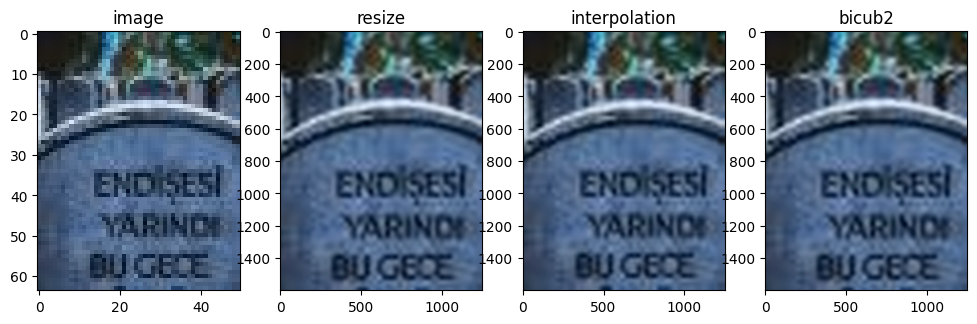

In [44]:
plt.figure(figsize=(12,6))

plt.subplot(1, 4, 1)
plt.title("image")
plt.imshow(image)

plt.subplot(1, 4, 2)
plt.title("resize")
plt.imshow(sharpened_image)

plt.subplot(1, 4, 3)
plt.title("interpolation")
plt.imshow(bicub)

plt.subplot(1, 4, 4)
plt.title("bicub2")
plt.imshow(upsampled_image)

plt.show()

In [45]:
mask = cv2.absdiff(sharpened_image, upsampled_image)


In [46]:
print(np.mean(mask.astype("float32")))

0.0


In [19]:
print(resize[:2,:2],"\n\n\n\n",bicub[:2,:2],"\nnew line\n" ,upsampled_image[:2,:2])

[[[24 23 32]
  [24 23 32]]

 [[24 23 32]
  [24 23 32]]] 



 [[[24 23 32]
  [24 23 32]]

 [[24 23 32]
  [24 23 32]]] 
new line
 [[[24 23 32]
  [24 23 32]]

 [[24 23 32]
  [24 23 32]]]
